In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install openl3

In [3]:
import openl3
import soundfile as sf

In [4]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import time
from tqdm import tqdm
import tensorflow as tf

In [ ]:

dataset_path = "/content/drive/MyDrive/faysond/genres_original"
genres = os.listdir(dataset_path)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

model = openl3.models.load_audio_embedding_model(input_repr="mel256", content_type="music", embedding_size=512)

data = []
labels = []

for genre in genres:
    genre_path = os.path.join(dataset_path, genre)
    genre_start_time = time.time()

    files_in_genre = os.listdir(genre_path)
    total_files_genre = min(len(files_in_genre), 10) 

    with tqdm(total=total_files_genre, desc=f"Processing {genre}") as pbar:
        for i, filename in enumerate(files_in_genre): 
            if i >= 10:
                break

            file_path = os.path.join(genre_path, filename)

            audio, sr = sf.read(file_path)

            embedding, timestamp = openl3.get_audio_embedding(audio, sr, model=model)

            data.append(embedding.flatten())
            labels.append(genre)

            pbar.update(1)

    genre_elapsed_time = time.time() - genre_start_time
    print(f"\nFinished processing {genre}. Time taken: {genre_elapsed_time:.2f} seconds")


Processing blues:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 894ms/step


Processing blues:  10%|█         | 1/10 [00:47<07:03, 47.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing blues:  20%|██        | 2/10 [00:50<02:49, 21.21s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing blues:  30%|███       | 3/10 [00:52<01:28, 12.70s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


Processing blues:  40%|████      | 4/10 [00:55<00:53,  8.93s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing blues:  50%|█████     | 5/10 [00:58<00:33,  6.68s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


Processing blues:  60%|██████    | 6/10 [01:01<00:21,  5.28s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


Processing blues:  70%|███████   | 7/10 [01:03<00:13,  4.40s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


Processing blues:  80%|████████  | 8/10 [01:06<00:07,  3.82s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step


Processing blues:  90%|█████████ | 9/10 [01:10<00:04,  4.02s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step


Processing blues: 100%|██████████| 10/10 [01:14<00:00,  7.44s/it]



Finished processing blues. Time taken: 74.42 seconds


Processing classical:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 953ms/step


Processing classical:  10%|█         | 1/10 [00:11<01:41, 11.33s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing classical:  20%|██        | 2/10 [00:14<00:51,  6.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing classical:  30%|███       | 3/10 [00:16<00:32,  4.63s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing classical:  40%|████      | 4/10 [00:19<00:22,  3.83s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


Processing classical:  50%|█████     | 5/10 [00:23<00:19,  3.98s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


Processing classical:  60%|██████    | 6/10 [00:27<00:15,  3.85s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


Processing classical:  70%|███████   | 7/10 [00:29<00:10,  3.42s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing classical:  80%|████████  | 8/10 [00:33<00:06,  3.49s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing classical:  90%|█████████ | 9/10 [00:37<00:03,  3.53s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing classical: 100%|██████████| 10/10 [00:39<00:00,  3.96s/it]



Finished processing classical. Time taken: 39.56 seconds


Processing country:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


Processing country:  10%|█         | 1/10 [00:03<00:32,  3.59s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing country:  20%|██        | 2/10 [00:07<00:28,  3.61s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing country:  30%|███       | 3/10 [00:10<00:23,  3.29s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing country:  40%|████      | 4/10 [00:12<00:18,  3.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing country:  50%|█████     | 5/10 [00:15<00:14,  2.90s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing country:  60%|██████    | 6/10 [00:19<00:12,  3.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing country:  70%|███████   | 7/10 [00:21<00:08,  2.97s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing country:  80%|████████  | 8/10 [00:24<00:05,  2.85s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


Processing country:  90%|█████████ | 9/10 [00:27<00:03,  3.08s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


Processing country: 100%|██████████| 10/10 [00:31<00:00,  3.15s/it]



Finished processing country. Time taken: 31.47 seconds


Processing disco:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing disco:  10%|█         | 1/10 [00:03<00:32,  3.66s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


Processing disco:  20%|██        | 2/10 [00:06<00:25,  3.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step


Processing disco:  30%|███       | 3/10 [00:10<00:25,  3.62s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing disco:  40%|████      | 4/10 [00:15<00:24,  4.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing disco:  50%|█████     | 5/10 [00:18<00:17,  3.57s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing disco:  60%|██████    | 6/10 [00:21<00:14,  3.59s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing disco:  70%|███████   | 7/10 [00:25<00:10,  3.59s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing disco:  80%|████████  | 8/10 [00:29<00:07,  3.69s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step


Processing disco:  90%|█████████ | 9/10 [00:33<00:03,  3.84s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing disco: 100%|██████████| 10/10 [00:35<00:00,  3.60s/it]



Finished processing disco. Time taken: 35.99 seconds


Processing hiphop:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 911ms/step


Processing hiphop:  10%|█         | 1/10 [00:12<01:48, 12.11s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step


Processing hiphop:  20%|██        | 2/10 [00:15<00:54,  6.83s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing hiphop:  30%|███       | 3/10 [00:18<00:35,  5.06s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing hiphop:  40%|████      | 4/10 [00:20<00:24,  4.07s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing hiphop:  50%|█████     | 5/10 [00:23<00:17,  3.52s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing hiphop:  60%|██████    | 6/10 [00:26<00:14,  3.55s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


Processing hiphop:  70%|███████   | 7/10 [00:39<00:19,  6.59s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step


Processing hiphop:  80%|████████  | 8/10 [00:43<00:11,  5.60s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing hiphop:  90%|█████████ | 9/10 [00:46<00:04,  4.98s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing hiphop: 100%|██████████| 10/10 [00:49<00:00,  4.94s/it]



Finished processing hiphop. Time taken: 49.45 seconds


Processing jazz:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing jazz:  10%|█         | 1/10 [00:03<00:32,  3.61s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing jazz:  20%|██        | 2/10 [00:06<00:26,  3.36s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing jazz:  30%|███       | 3/10 [00:10<00:24,  3.48s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


Processing jazz:  40%|████      | 4/10 [00:14<00:21,  3.53s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


Processing jazz:  50%|█████     | 5/10 [00:16<00:16,  3.20s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


Processing jazz:  60%|██████    | 6/10 [00:19<00:12,  3.19s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing jazz:  70%|███████   | 7/10 [00:23<00:10,  3.34s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing jazz:  80%|████████  | 8/10 [00:27<00:06,  3.44s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing jazz:  90%|█████████ | 9/10 [00:29<00:03,  3.22s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing jazz: 100%|██████████| 10/10 [00:32<00:00,  3.30s/it]



Finished processing jazz. Time taken: 33.01 seconds


Processing pop:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing pop:  10%|█         | 1/10 [00:03<00:32,  3.63s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing pop:  20%|██        | 2/10 [00:07<00:30,  3.85s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


Processing pop:  30%|███       | 3/10 [00:11<00:27,  3.97s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing pop:  40%|████      | 4/10 [00:15<00:23,  3.84s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


Processing pop:  50%|█████     | 5/10 [00:17<00:16,  3.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing pop:  60%|██████    | 6/10 [00:20<00:12,  3.10s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step


Processing pop:  70%|███████   | 7/10 [00:24<00:10,  3.41s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing pop:  80%|████████  | 8/10 [00:28<00:06,  3.47s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


Processing pop:  90%|█████████ | 9/10 [00:31<00:03,  3.51s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


Processing pop: 100%|██████████| 10/10 [00:35<00:00,  3.54s/it]



Finished processing pop. Time taken: 35.38 seconds


Processing metal:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing metal:  10%|█         | 1/10 [00:03<00:27,  3.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing metal:  20%|██        | 2/10 [00:06<00:28,  3.54s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing metal:  30%|███       | 3/10 [00:10<00:25,  3.57s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing metal:  40%|████      | 4/10 [00:13<00:20,  3.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing metal:  50%|█████     | 5/10 [00:16<00:15,  3.17s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing metal:  60%|██████    | 6/10 [00:20<00:13,  3.33s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing metal:  70%|███████   | 7/10 [00:22<00:09,  3.09s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


Processing metal:  80%|████████  | 8/10 [00:26<00:06,  3.26s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing metal:  90%|█████████ | 9/10 [00:29<00:03,  3.39s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing metal: 100%|██████████| 10/10 [00:33<00:00,  3.36s/it]



Finished processing metal. Time taken: 33.60 seconds


Processing reggae:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing reggae:  10%|█         | 1/10 [00:03<00:32,  3.61s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing reggae:  20%|██        | 2/10 [00:08<00:34,  4.27s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing reggae:  30%|███       | 3/10 [00:11<00:27,  3.96s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing reggae:  40%|████      | 4/10 [00:15<00:22,  3.82s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing reggae:  50%|█████     | 5/10 [00:18<00:18,  3.68s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


Processing reggae:  60%|██████    | 6/10 [00:21<00:13,  3.30s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


Processing reggae:  70%|███████   | 7/10 [00:25<00:10,  3.40s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing reggae:  80%|████████  | 8/10 [00:27<00:06,  3.15s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


Processing reggae:  90%|█████████ | 9/10 [00:31<00:03,  3.32s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing reggae: 100%|██████████| 10/10 [00:34<00:00,  3.40s/it]



Finished processing reggae. Time taken: 34.04 seconds


Processing rock:   0%|          | 0/10 [00:00<?, ?it/s]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


Processing rock:  10%|█         | 1/10 [00:03<00:32,  3.62s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


Processing rock:  20%|██        | 2/10 [00:06<00:25,  3.14s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step


Processing rock:  30%|███       | 3/10 [00:10<00:24,  3.45s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Processing rock:  40%|████      | 4/10 [00:12<00:18,  3.13s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


Processing rock:  50%|█████     | 5/10 [00:16<00:16,  3.31s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 861ms/step


Processing rock:  60%|██████    | 6/10 [00:25<00:21,  5.25s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


Processing rock:  70%|███████   | 7/10 [00:29<00:14,  4.72s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step


Processing rock:  80%|████████  | 8/10 [00:31<00:08,  4.03s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


Processing rock:  90%|█████████ | 9/10 [00:35<00:03,  3.91s/it]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


Processing rock: 100%|██████████| 10/10 [00:38<00:00,  3.90s/it]


Finished processing rock. Time taken: 38.97 seconds


In [ ]:
df = pd.DataFrame(data)
df["genre"] = labels

label_encoder = LabelEncoder()
df["genre"] = label_encoder.fit_transform(df["genre"])

X = df.drop(columns=["genre"])
y = df["genre"]

X_train, X_test_final, y_train, y_test_final = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test_final)  


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  
    scoring='accuracy',
    n_jobs=-1
)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line

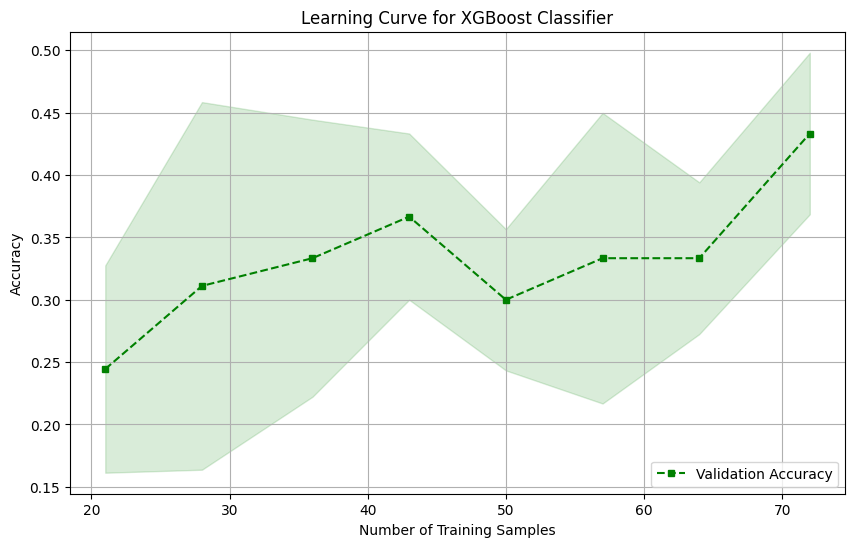

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Learning Curve for XGBoost Classifier')
plt.show()


In [ ]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    learning_rate=0.05,
    max_depth=8,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2
)

print("Starting Training...")
xgb_model.fit(X_train, y_train)
print("Training Completed!")

Starting Training...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Completed!


In [ ]:
y_pred_final = xgb_model.predict(X_test_final)
accuracy = accuracy_score(y_test_final, y_pred_final)
print(f"\nFinal Model Accuracy on Test Set: {accuracy * 100:.2f}%")


Final Model Accuracy on Test Set: 70.00%


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_final, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

       blues       0.50      1.00      0.67         1
   classical       0.00      0.00      0.00         1
     country       1.00      1.00      1.00         1
       disco       0.00      0.00      0.00         1
      hiphop       0.33      1.00      0.50         1
        jazz       1.00      1.00      1.00         1
       metal       1.00      1.00      1.00         1
         pop       1.00      1.00      1.00         1
      reggae       1.00      1.00      1.00         1
        rock       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.58      0.70      0.62        10
weighted avg       0.58      0.70      0.62        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
xgb_model.save_model("music_genre_model8.json")
np.save("label_encoder8.npy", label_encoder.classes_)
np.save("scaler8.npy", scaler)